本节目标：
- 了解时间序列预测的概念，以及常用的模型算法，包括 AR、 MA、 ARMA、 ARIMA 模型等；


- 掌握并使用 ARMA 模型工具，对一个时间序列数据进行建模和预测；


- 对比特币的历史数据进行时间序列建模，并预测未来6个月的走势

时间序列分析和回归分析的区别：

1. 选择模型前，如何确定结果和变量之间的关系：
    - 回归分析：分析自变量(y)和自变量(x)之间的相关性，而后代入新的自变量 x 来预测因变量 y；
    - 时间序列分析：自变量和时间的相关性。
1. 与时间的关系：
    - 回归分析：基本无关。
    - 时间序列分析：分析目标变量在时间基础上的趋势、周期、时期和不稳定因素等等。

## 时间序列模型

### 模型介绍

AR ： Auto Regression，自回归模型。认为**过去**某个时刻的点，通过**线性组合**，再加上**白噪声**就可以**预测未来**某个时刻的点。其中的历史白噪声听过影响历史时序值，从而间接影响到当前时刻点的预测值。<br>可以理解为期望为 0，方差为常数的纯随机过程。

AR(p) 模型，p 阶自回归模型。指的是通过这个时刻点的前 p 个点，通过线性组合再加上白噪声来预测当前时刻点的值。

MA ： Moving Average，滑动平均模型。通过历史白噪声来进行线性组合来影响当前时刻点。

MA(q) 模型，q 阶移动平均模型。

ARMA : Auto Regressive Moving Average，自回归滑动平均模型。即 AR 模型和 MA 模型的组合。

ARMA(p,q) 模型。

ARIMA : Auto Regressive Integrated Moving Average 模型，差分自回归华东平均模型，也叫求合自回归滑动平均模型。
相较于 ARMA 模型，ARIMA 模型多了个差分过程，以便于对不平稳数据进行差分平稳，在差分平稳后再进行建模。

ARIMA(p,d,q) 模型，其中 d 是差分阶数。

### 工具使用

In [ ]:
from statsmodels.tsa.arima_model import ARMA

ARMA(endog, order, exog=None)

endong: endogenous variable，内生变量，又叫非政策性变量，由模型决定，是项目中需要用到的变量；

order: p 和 q 的值，也就是 ARMA 中的阶数；

exog: exogenous variables，外生变量，又叫政策性变量，非研究变量；

例子：

In [ ]:
ARMA(data,(7,0))

data: 研究的变量；

(7,0): (p,q)的阶数。

### 实例

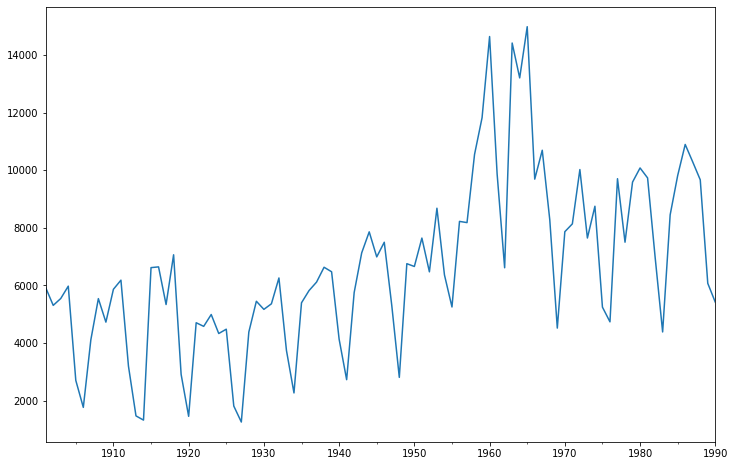

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


AIC: %0.4lf


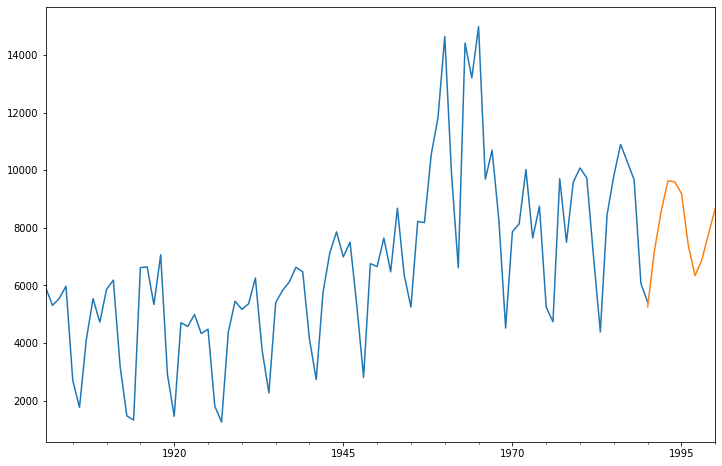

In [2]:
# coding:uft-8
# 用 ARMA 进行时间序列预测
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot

# 创建数据
data = [5922, 5308, 5546, 5975, 2704, 1767,
        4111, 5542, 4726, 5866, 6183, 3199,
        1471, 1325, 6618, 6644, 5337, 7064,
        2912, 1456, 4705, 4579, 4990, 4331,
        4481, 1813, 1258, 4383, 5451, 5169,
        5362, 6259, 3743, 2268, 5397, 5821,
        6115, 6631, 6474, 4134, 2728, 5753,
        7130, 7860, 6991, 7499, 5301, 2808,
        6755, 6658, 7644, 6472, 8680, 6366,
        5252, 8223, 8181, 10548, 11823, 14640,
        9873, 6613, 14415, 13204, 14982, 9690,
        10693, 8276, 4519, 7865, 8137, 10022,
        7646, 8749, 5246, 4736, 9705, 7501,
        9587, 10078, 9732, 6986, 4385, 8451,
        9815, 10894, 10287, 9666, 6072, 5418]
data=pd.Series(data)
data_index = sm.tsa.datetools.dates_from_range('1901','1990')

# 绘制数据图
data.index = pd.Index(data_index)
data.plot(figsize=(12,8))
plt.show()

# 创建 ARMA 模型 # 创建 ARMA 模型
arma = ARMA(data,(7,0)).fit()  # 通过 fit 函数拟合
print('AIC: %0.4lf'.format(arma.aic)) # 根据 AIC 的值来判断模型的好坏

# 模型预测
predict_y = arma.predict('1990', '2000')

# 预测结果绘制
fig, ax = plt.subplots(figsize=(12, 8))
ax = data.loc['1901':].plot(ax=ax)
predict_y.plot(ax=ax)
plt.show()

在实际项目中，需要给 p 和 q 指定一个范围，让 ARMA 都运行一下，然后选择最适合的模型。

如何判断一个模型是否适合？

AIC 准则，也叫 赤池消息准则，数值越小，代表模型拟合得越好。

## 对比特币走势进行预测

数据集中各字段的含义：<img src="https://static001.geekbang.org/resource/image/b0/36/b0db4047723ec5e649240e2a87196a36.png" style="width:300px">

项目流程：<img src="https://static001.geekbang.org/resource/image/95/1e/95f8294c1f4805b86f9947178499181e.jpg" style="width:500px">

1. 探索数据，采用数据可视化方式查看比特币的历史走势。时间尺度选择天、月、季度、年对数据进行可视化呈现。
1. 选择 Weighted_Price 字段作为数据观察结果，结合所选时间尺度，对字段进行处理，得到`df_M = df.resample('M').mean()  df_Q = df.resample('Q-DEC').mean()  df_Y = df.resample('A-DEC').mean()`；
1. 对 p 和 q 取范围值，得到范围内 AIC 最小值对应的 ARMA 模型；
1. 使用得到的 ARMA 模型预测未来 8 个月的比特币平均走势；
1. 对预测结果做可视化呈现。

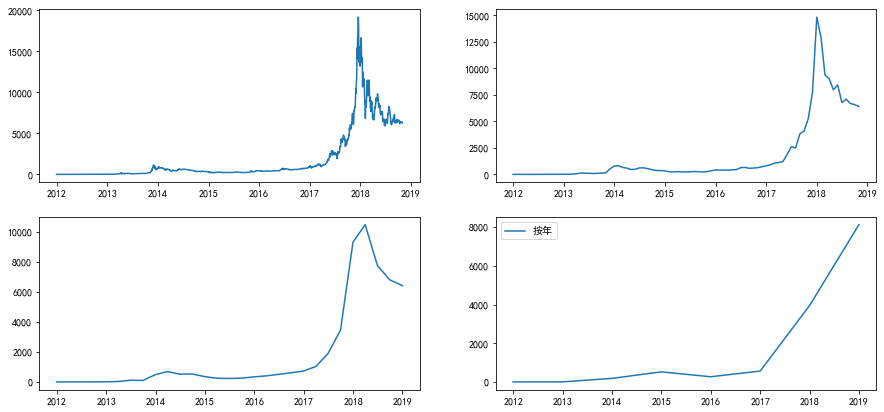

参数错误： (0, 2)
最优模型：                               ARMA Model Results                              
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                     ARMA(1, 1)   Log Likelihood                -688.761
Method:                       css-mle   S.D. of innovations            957.763
Date:                Sun, 24 Nov 2019   AIC                           1385.522
Time:                        20:04:59   BIC                           1395.198
Sample:                    12-31-2011   HQIC                          1389.409
                         - 10-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2104.9455   1567.759      1.343      0.183    -967.805    5177.696
ar.L1.Weighted_Price     0.9251      0.042     22.042      0.000       0.843      

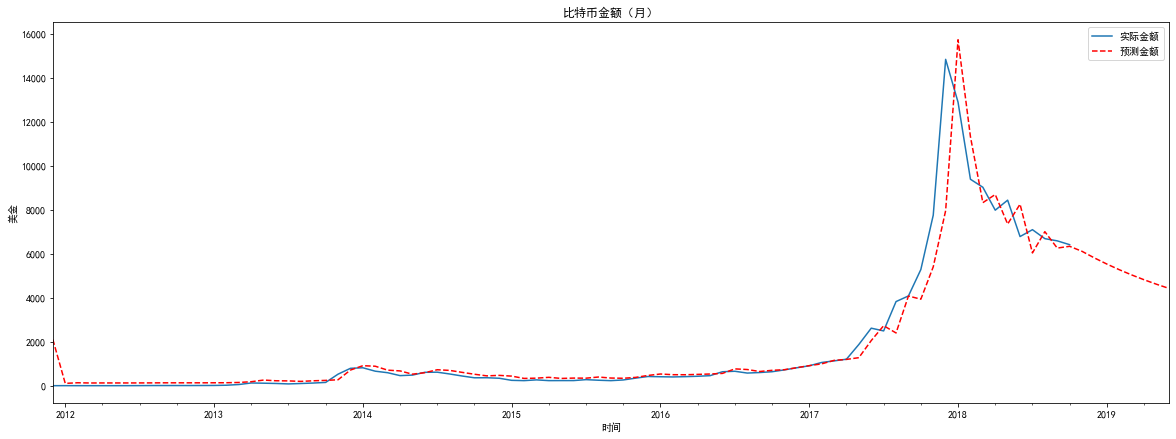

In [12]:
# coding: utf-8
# 比特币走势预测，使用时间序列 ARMA
import numpy as np  # 用于数据清洗
import pandas as pd  # 用于数据读取、数据清洗
import matplotlib.pyplot as plt  # 用于可视化
import warnings  # 忽视程序执行过程中出现的 warning
from datetime import datetime  # 用于处理时间数据
from itertools import product  # 用于迭代 p 和 q 值
from statsmodels.tsa.arima_model import ARMA  # 导入 ARMA 数据

# 忽视程序执行过程中出现的 warning
warnings.filterwarnings('ignore')

# 数据导入、设置索引
df = pd.read_csv('./datasets/bitcoin_2012-01-01_to_2018-10-31.csv')
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp

# 按月、季度、年来统计
df_M = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_Y = df.resample('A-DEC').mean()

# 按天、月、季度、年来显示比特币的走势
fig = plt.figure(figsize=(15, 7))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label="按天")
plt.subplot(222)
plt.plot(df_M.Weighted_Price, '-', label="按月")
plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label="按季度")
plt.subplot(224)
plt.plot(df_Y.Weighted_Price, '-', label="按年")
plt.legend()
plt.show()

# 设置 q 和 p 的取值范围
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)

# 寻找最优 ARMA 模型参数
results = []
best_aic = float("inf")  # 正无穷
for param in parameters_list:
    try:
        model = ARMA(df_M.Weighted_Price, order=(param[0], param[1])).fit()
    except:
        print("参数错误：", param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['patameters', 'aic']
print("最优模型：", best_model.summary())

# 比特币预测
df_M2 = df_M[['Weighted_Price']]  # 获取比特币价格数据
date_list = [datetime(2018, 11, 30), datetime(2018, 12, 31),  # 设置时间索引数据
             datetime(2019, 1, 31), datetime(2019, 2, 28),
             datetime(2019, 3, 31), datetime(2019, 4, 30),
             datetime(2019, 5, 31), datetime(2019, 6, 30)]
future = pd.DataFrame(index=date_list, columns=df_M.columns)  # 预测的时间范围
df_M2 = pd.concat([df_M2, future])  # 拼接数据
df_M2['forecast'] = best_model.predict(start=0, end=91)  # 生成预测数据，总共 91 个月

# 预测数据可视化
plt.figure(figsize=(20, 7))
df_M2.Weighted_Price.plot(label="实际金额")
df_M2.forecast.plot(color='r', ls='--', label="预测金额")
plt.legend() # 显示图例
plt.title("比特币金额（月）")  # 可视化图形标题
plt.xlabel("时间")  # 设置 X 轴标签
plt.ylabel("美金")  # 设置 Y 轴标签
plt.show()  # 显示图形

## 总结

当对一个数值进行预测时，如果考虑的是多个变量和结果之间的关系，采用回归分析；如果考虑的是单个时间维度和结果之间的关系，采用时间序列分析。

不过，比特币的走势受很多因素影响，比如政策因素。（比如习老板发表的区块链讲话，导致比特币价格疯涨。--。）

![](https://static001.geekbang.org/resource/image/24/94/24f8ee2f600a2451eecd58a98f7db894.png)

## 练习

1. AR、MA、ARMA 和 ARIMA 之间的区别；
1. 编写代码使用 ARMA 模型对沪市指数未来 10 个月（截止到 2019 年 12 月 31 日）的变化进行预测（时间尺度采用月即可）。

### AR、MA、ARMA 和 ARIMA 之间的区别

AR：过去若干时刻的点通过线性组合，再加上白噪声就可以预测未来某个时刻的点；

MA：AR 模型是历史时序值得线性组合，MA 是通过历史白噪声进行线性组合来影响当前时刻；

ARMA：是 AR 和 MA 两个模型的组合，但估计更准确；

ARIMA：相较于 ARMA，多个差分过程，作用是对不平稳数据进行差分平稳，在差分平稳后再进行建模。

### 沪市指数

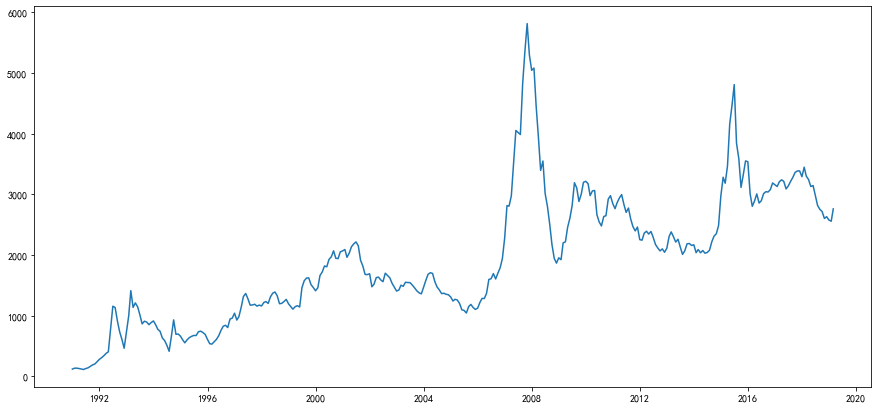

参数错误： (0, 2)


,Price
2019-03-31,NaN
2019-04-30,NaN
2019-05-31,NaN
2019-06-30,NaN
2019-07-31,NaN
2019-08-31,NaN
2019-09-30,NaN
2019-10-31,NaN
2019-11-30,NaN
2019-12-31,NaN


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
from itertools import product
from statsmodels.tsa.arima_model import ARMA

warnings.filterwarnings('ignore')

df = pd.read_csv("./datasets/shanghai_1990-12-19_to_2019-2-28.csv")
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
# df.head()

df_M = df.resample('M').mean()

fig = plt.figure(figsize=(15, 7))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(df_M.Price, '-', label="按月")
plt.show()

ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)

results = []
best_aic = float('inf')
for param in parameters_list:
    try:
        model = ARMA(df_M.Price, order=(param[0], param[1])).fit()
    except:
        print("参数错误：", param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
# print("最优模型：", best_model.summary())

df_M2 = df_M[['Price']]
date_list = [datetime(2019, 3, 31), datetime(2019, 4, 30), datetime(2019, 5, 31),
             datetime(2019, 6, 30), datetime(2019, 7, 31), datetime(2019, 8, 31),
             datetime(2019, 9, 30), datetime(2019, 10, 31), datetime(2019, 11, 30),
             datetime(2019, 12, 31)]

future = pd.DataFrame(index=date_list, columns=df_M.columns)
df_M2 = pd.concat([df_M2, future])
df_M2['forecast'] = best_model.predict(start=0,end=348)

plt.figure(figsize=(20,7))
df_M2.Price.plot(label='实际金额')
df_M2.forecast.plot(color = 'r', ls = '--', label="预测金额")
plt.legend()
plt.title("沪指数金额（月）")
plt.xlabel("时间")
plt.ylabel("指数")
plt.show()

### 其他

LSTM：Long short-term memory

单位根检验：

白噪声检验：

数据平稳性检查：